# Homework 2

In [2]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline

## Not Quite Plug and Chug

In [3]:
# Split test and train data into X and y
train_file = "training.csv"
test_file = "test.csv"

df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

train_x = df_train.drop(df_train.columns[3], axis=1)
train_y = df_train.drop(df_train.columns[0:3], axis=1)
test_x = df_test.drop(df_test.columns[3], axis=1)
test_y = df_test.drop(df_test.columns[0:3], axis=1)

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(999, 3) (999, 1) (2999, 3) (2999, 1)


/Users/pdash/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 0.08908909  0.08908909  0.08908909  0.08908909]
 [ 0.08908909  0.08908909  0.08908909  0.08908909]
 [ 0.08908909  0.08908909  0.08908909  0.08908909]
 [ 0.08908909  0.08908909  0.08908909  0.08908909]
 [ 0.02002002  0.02002002  0.02002002  0.02002002]]
[[ 0.44148049  0.44148049  0.44148049  0.44148049]
 [ 0.44148049  0.44148049  0.44148049  0.44148049]
 [ 0.44148049  0.44148049  0.44148049  0.44148049]
 [ 0.44148049  0.44148049  0.44148049  0.44148049]
 [ 0.44114705  0.44114705  0.44114705  0.44114705]]


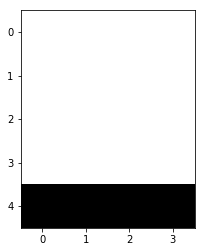

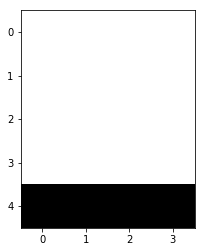

In [4]:
C = [0.0001, 0.001, 0.01, 0.1, 1]
d = [1, 2, 3, 10]
error_test = np.zeros((5, 4))
error_train = np.zeros((5, 4))

for i in range(len(C)):
    for j in range(len(d)):
        svm = SVC(C=C[i], degree=d[j])
        svm.fit(train_x, train_y)
        error_train[i][j] = 1 - svm.score(train_x, train_y)
        error_test[i][j] = 1 - svm.score(test_x, test_y)

print(error_train)
print(error_test)

plt.imshow(error_train, cmap='gray', interpolation='none')
plt.show()
plt.imshow(error_test, cmap='gray', interpolation='none')
plt.show()

### On what basis would you decide that a hyperparameter setting is optimal? Which setting of (C, d) gave the optimal results?
#### I chose to define optimal as the settings that produced the least error in both test and training sets. In this case, the optimal setting was (C = 1, d = [1, 2, 3, or 5])

### You’ll notice that between C and d, one factor mattered far more than the other. What can you conclude about the structure of the datasets and how they were generated?
#### It appears that C was far more important for this data because the real change in the error rates came after a change in C from 0.1 to 1. This suggests that there are not many misclassified points in our model since the penalty that resulted with the lowest error was C=1. This could mean that the data has a smaller margin between the linear separator and the points are packed close together. Also shown in the data, changing the degree of the polynomial did not affect the results which means that the data is constructed to fit these degree shapes.

### With as much granularity as possible, which hyperparameter settings are underfitting and which are overfitting? What allows you to make this claim?
#### The lower values of C's are underfitting while d is overfitting. This is because the value of C with the lowest error is the default 1. Also, the value of d did not have any effect.

## K-Fold Cross Validation

In [8]:
from sklearn.model_selection import cross_val_score

gammas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
results = []
train_y = np.ravel(train_y)
for gamma in gammas:
    svm = SVC(kernel='rbf', gamma=gamma)
    scores = cross_val_score(svm, train_x, train_y, cv=7)
    scores
    results.append([round(1 - score, 3) for score in scores])

for i in range(len(gammas)):
    print("gamma: ", gammas[i])
    print("scores: ", results[i])

gamma:  0.001
scores:  [Decimal('0.091'), Decimal('0.091'), Decimal('0.091'), Decimal('0.091'), Decimal('0.091'), Decimal('0.085'), Decimal('0.085')]
gamma:  0.01
scores:  [Decimal('0.042'), Decimal('0.070'), Decimal('0.049'), Decimal('0.042'), Decimal('0.056'), Decimal('0.035'), Decimal('0.035')]
gamma:  0.1
scores:  [Decimal('0.035'), Decimal('0.056'), Decimal('0.007'), Decimal('0.049'), Decimal('0.035'), Decimal('0.021'), Decimal('0.028')]
gamma:  1
scores:  [Decimal('0.049'), Decimal('0.063'), Decimal('0.035'), Decimal('0.063'), Decimal('0.042'), Decimal('0.042'), Decimal('0.028')]
gamma:  10
scores:  [Decimal('0.091'), Decimal('0.091'), Decimal('0.084'), Decimal('0.091'), Decimal('0.091'), Decimal('0.077'), Decimal('0.077')]
gamma:  100
scores:  [Decimal('0.091'), Decimal('0.091'), Decimal('0.091'), Decimal('0.091'), Decimal('0.091'), Decimal('0.085'), Decimal('0.085')]
gamma:  1000
scores:  [Decimal('0.091'), Decimal('0.091'), Decimal('0.091'), Decimal('0.091'), Decimal('0.091'),